In [ ]:
# This notebook does some quick plots to check your input data and your FWI for plausibility

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from cartopy import crs as ccrs
from cartopy import feature as cfeature

In [148]:
workdir = "/work/bb1153/m300363/fireweather_data/California/"

YYYY=2023

model="IFS_9-FESOM_5"
exp="production"

# model="ICON"
# exp="ngc4008"

infile_input = workdir + "inputvars_" + model + "_" + exp + "_California_025deg_" + str(YYYY) + ".nc"
infile_fwi = workdir + "fwi_test_" + model + "_" + str(YYYY) + ".nc"

# infile_fwi = workdir + "test.nc"

ds_input = xr.load_dataset(infile_input)
ds_fwi = xr.load_dataset(infile_fwi)

In [1]:
# uncomment to check variables in ds_fwi
# 
# ds_fwi

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = super().contourf(*args, **kwargs)


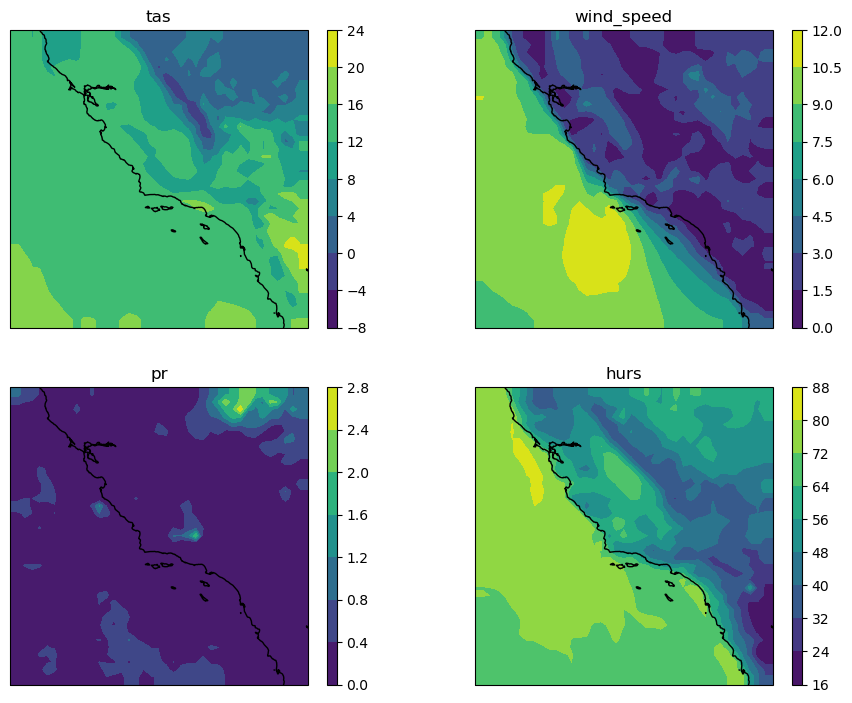

In [140]:
proj=ccrs.PlateCarree()

varlist=["tas","wind_speed","pr","hurs"]
ts=10

fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': proj},
                        figsize=(11,8.5))

axs=axs.flatten()

for i, var in enumerate(varlist):
    data=ds_input[var][ts,:,:]
    #ax.axes(projection=proj)
    #ax.add_feature(cfeature.COASTLINE)
    contourplot = axs[i].contourf(ds_input.lon,ds_input.lat,data,add_colorbar=True)
    cbar = plt.colorbar(contourplot,orientation='vertical',pad=0.05,aspect=30,ax=axs[i])
    axs[i].coastlines()
    axs[i].set_title(var)

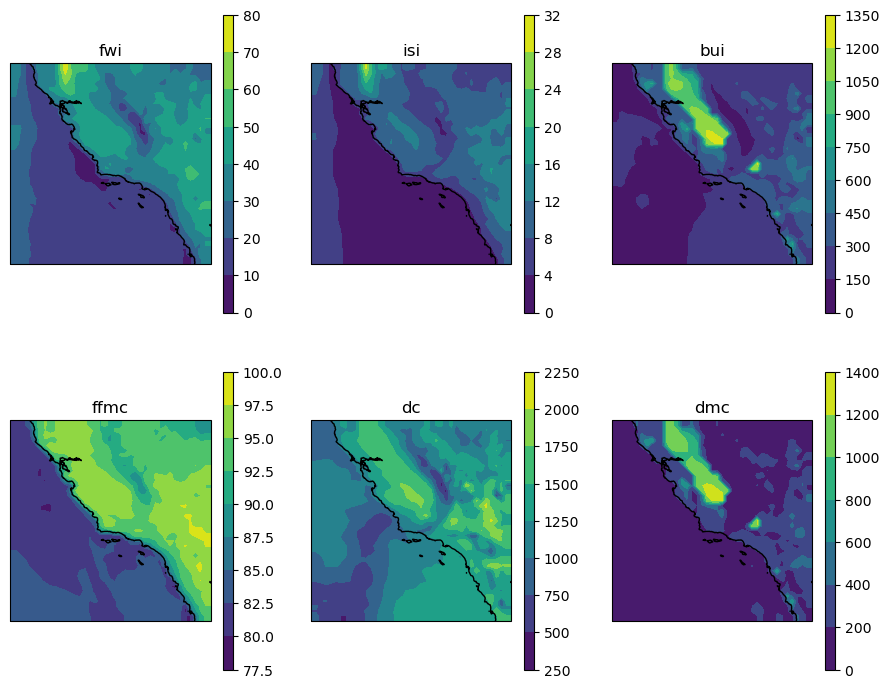

In [151]:
proj=ccrs.PlateCarree()

ts=300

varlist=["fwi","isi","bui","ffmc","dc","dmc"]
cbar_boundaries=np.arange(0, 100, 10)
limit_cbar=False

fig, axs = plt.subplots(nrows=2,ncols=3,
                        subplot_kw={'projection': proj},
                        figsize=(11,8.5))

axs=axs.flatten()

for i, var in enumerate(varlist):
    data=ds_fwi[var][ts,:,:]
    #ax.axes(projection=proj)
    #ax.add_feature(cfeature.COASTLINE)
    if limit_cbar:
        contourplot = axs[i].contourf(ds_fwi.lon,ds_fwi.lat,data,cbar_boundaries,add_colorbar=True,extend="both")
    else:
        contourplot = axs[i].contourf(ds_fwi.lon,ds_fwi.lat,data,add_colorbar=True)   
    cbar = plt.colorbar(contourplot,orientation='vertical',pad=0.05,aspect=30,ax=axs[i])
    axs[i].coastlines()
    axs[i].set_title(var)